In [31]:
import pandas as pd  #veri işlemesi ve analizi için Python programlama dilinde yazılmış olan bir yazılım kütüphanesidir
from sklearn.model_selection import train_test_split  #bir veri setini eğitim ve test kümelerine bölme işlemini gerçekleştiren bir fonksiyondur
from sklearn.linear_model import LinearRegression  #Lineer Regresyon kütüphanesi için kullanıldı
import matplotlib.pyplot as plt   #veri görselleştirmesinde kullandığımız temel python kütüphanesidir.
import seaborn as sns  #MatPlotLib kütüphanesini temel alan bir Python görselleştirme kütüphanesidir


In [32]:
data = pd.read_csv("data.csv")

In [33]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [34]:
data.info() #Veri bilgilerini ekrana verir.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [35]:
data.city.value_counts() #Verilerideki Değerleri Sayar.

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

<Axes: ylabel='bedrooms'>

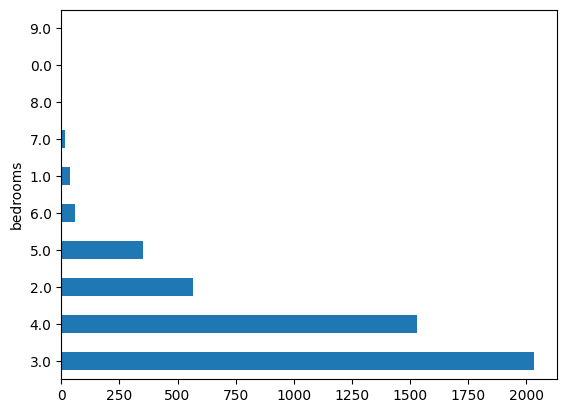

In [36]:
data.bedrooms.value_counts().plot.barh() #Ev sayısına göre kaç adet yatak odası olduğu getirir.

In [37]:
data.price.value_counts()  #Fiyatlardan kaç tane olduğunu gösterir.

price
0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: count, Length: 1741, dtype: int64

In [38]:
data.drop(data[data['price'] == 0].index, inplace=True) #Ücreti 0 olan değerleri çıkarıldı.

In [39]:
data.sqft_living.value_counts() #m2 de kaç tane ev olduğunu gösterir.

sqft_living
1940    32
1720    32
1840    31
1660    31
2000    29
        ..
5180     1
5660     1
1463     1
4160     1
2538     1
Name: count, Length: 561, dtype: int64

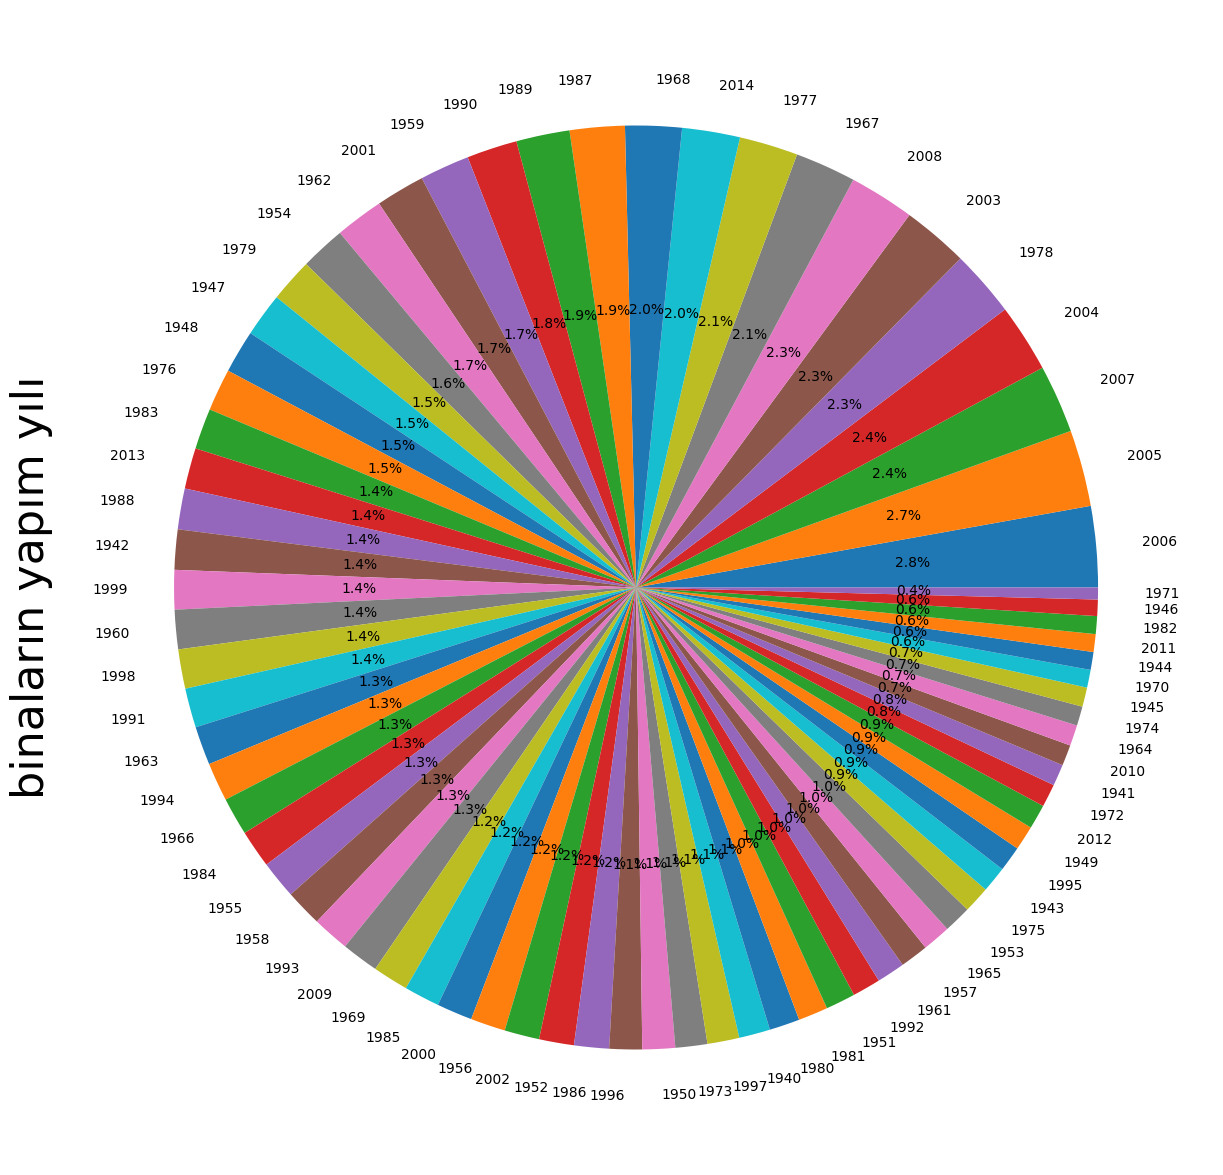

In [40]:
filtered_data = data[data['yr_built'] > 1939]   #

fig = plt.figure(figsize=(30, 15))
filtered_data['yr_built'].value_counts().plot(kind='pie', autopct='%.1f%%')

plt.ylabel("binaların yapım yılı", fontsize=32)
plt.show()

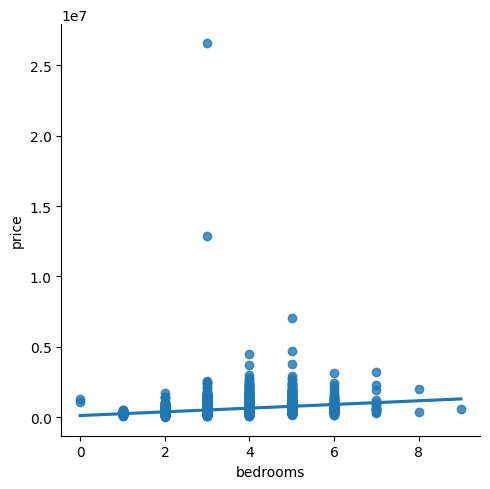

In [41]:
sns.lmplot(x='bedrooms', y='price', data=data)

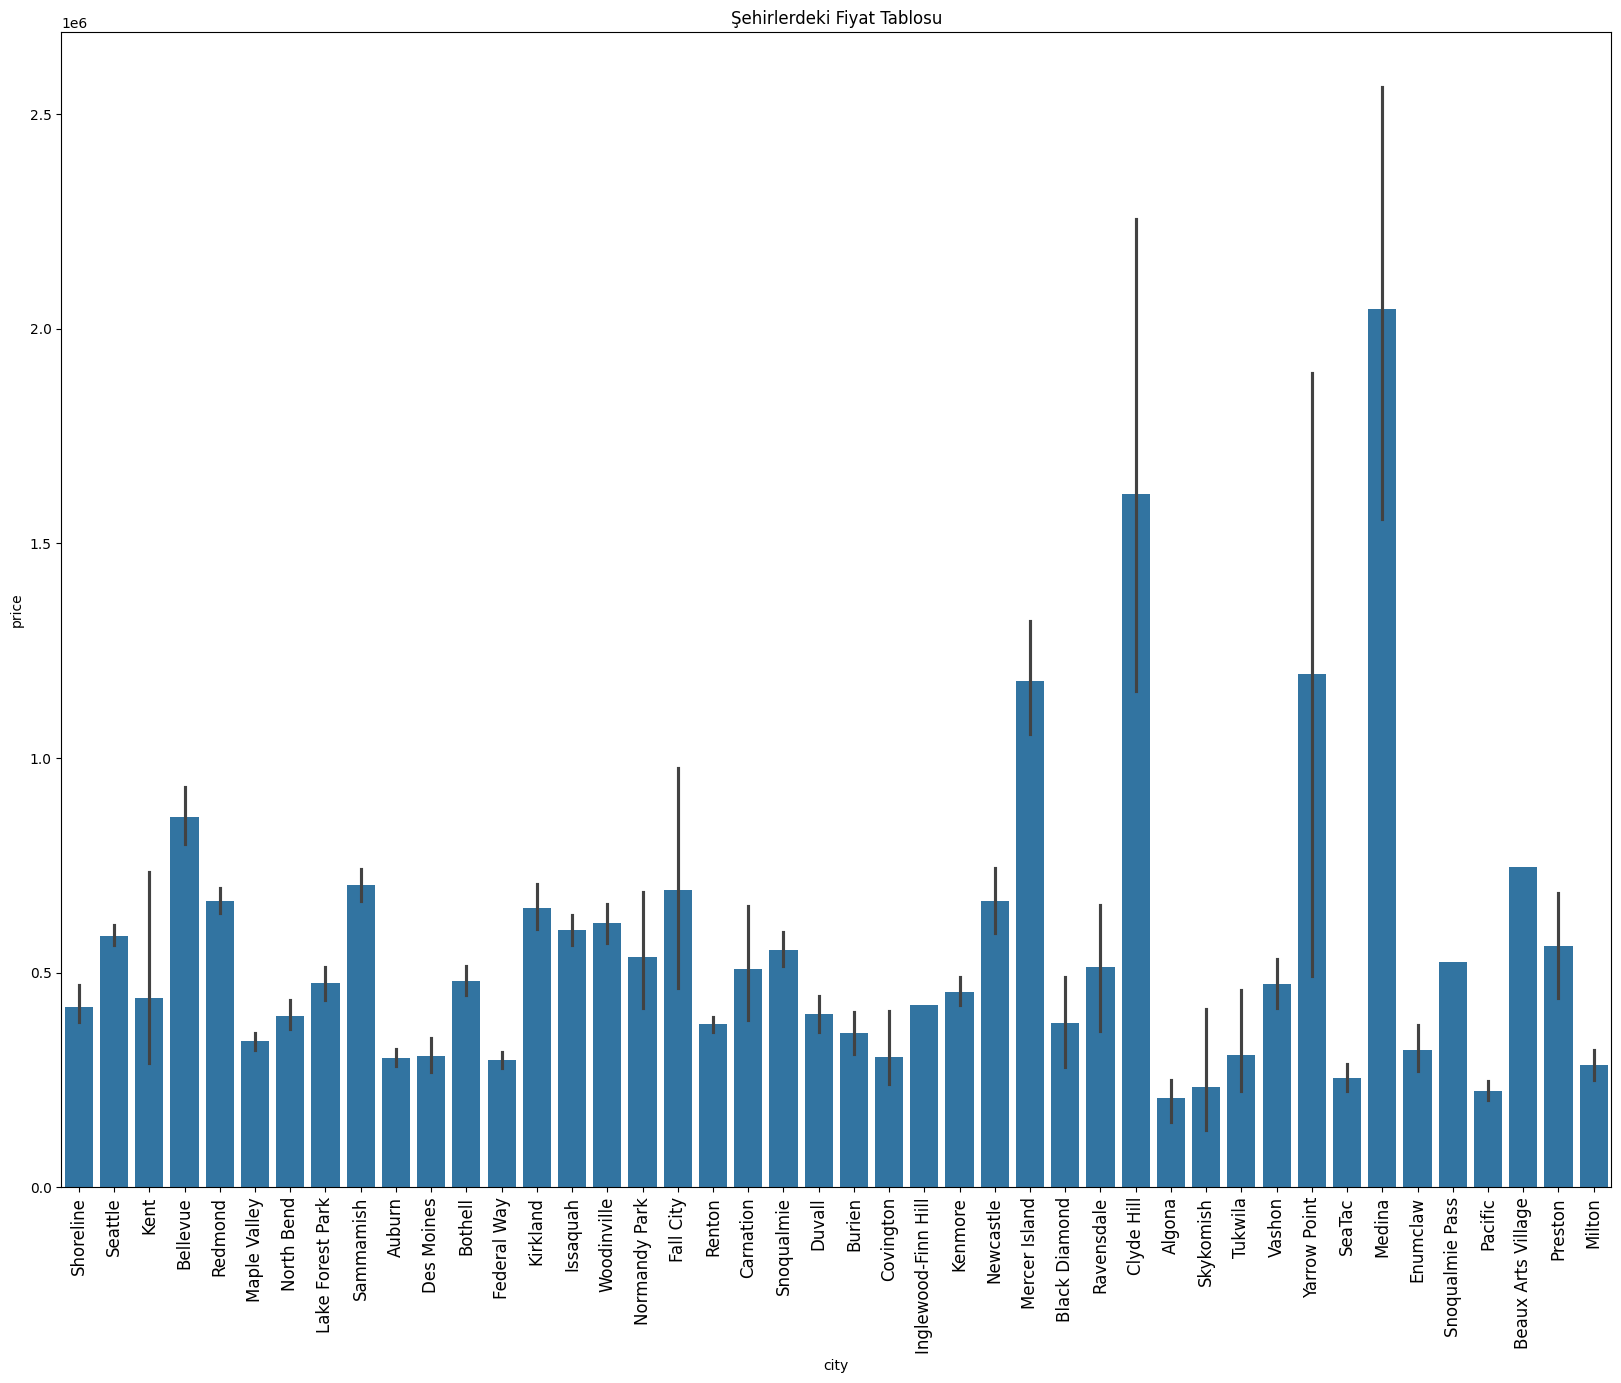

In [42]:
plt.figure(figsize=(20,15))
sns.barplot(x=data["city"], y=data["price"])
plt.title("Şehirlerdeki Fiyat Tablosu")
plt.xticks(rotation=90, size=12)
plt.show()

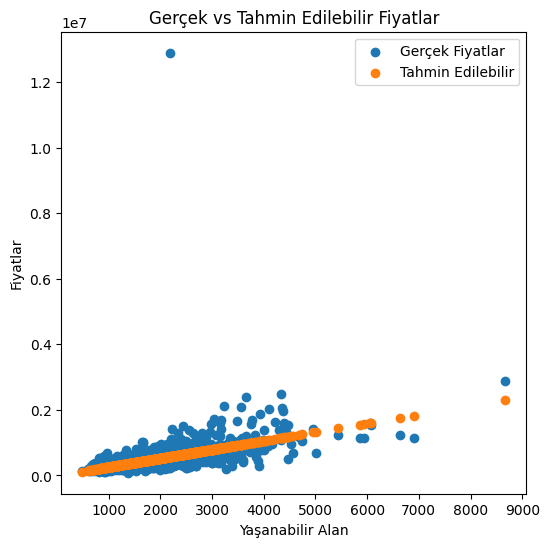

In [43]:
X = data[['sqft_living']]
y = data['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Lineer regresyon modeli oluşturma ve eğitme
lr = LinearRegression()
lr.fit(X_train, Y_train)

# Test seti üzerinde tahmin yapma
predictions = lr.predict(X_test)

# Scatter plot oluşturma
plt.figure(figsize=(6, 6))
plt.scatter(X_test, Y_test, label='Gerçek Fiyatlar')  # Gerçek değerler
plt.scatter(X_test, predictions, label='Tahmin Edilebilir')  # Tahmin edilen değerler
plt.xlabel('Yaşanabilir Alan') #
plt.ylabel('Fiyatlar')
plt.title('Gerçek vs Tahmin Edilebilir Fiyatlar')
plt.legend()
plt.show()